# Comparing with Cognite

In [1]:
from connect import init_cognite_connect
creds, config, client = init_cognite_connect()

### Detection

In [2]:
image_id = 2872269792370750

In [12]:
from cognite.client.data_classes.contextualization import VisionFeature
extract_job =client.vision.extract(features=VisionFeature.INDUSTRIAL_OBJECT_DETECTION, file_ids=[image_id])
extract_job.wait_for_completion()

/Users/maiken/anaconda3/envs/project_thesis/lib/python3.11/site-packages/cognite/client/_api/vision.py:103: UserWarning: Features [<VisionFeature.INDUSTRIAL_OBJECT_DETECTION: 'IndustrialObjectDetection'>] are in beta and are still in development
  warnings.warn(f"Features {beta_features} are in beta and are still in development")


In [13]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
binary_png = client.files.download_bytes(id=image_id)
image_nparray = np.frombuffer(binary_png,dtype=np.uint8)#dtype=np.uint8
image_bgr = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR)  # This will give you a BGR image
# Convert from BGR to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
img_height, img_width, channels = image_rgb.shape

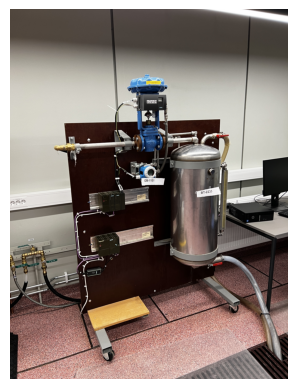

In [14]:
#plt.figure(figsize=(20,20))
fig, ax = plt.subplots(1)
ax.imshow(image_rgb)
for item in extract_job.result["items"]:
    predictions = item["predictions"]
    for prediction in predictions["industrialObjectPredictions"]:
        label=prediction['label']
        confidence=prediction["confidence"]
        bbox = prediction["boundingBox"]
        x_min = bbox["xMin"]*img_width
        x_max = bbox["xMax"]*img_width
        y_min= bbox["yMin"]*img_height
        y_max = bbox["yMax"]*img_height
        width = x_max-x_min
        height = y_max-y_min
        #Draw rectangle around the object
        #print("x_min:", x_min, "y_min", "Width:",width, "Height",height)
        rect = patches.Rectangle((x_min,y_min,),width, height,linewidth=1, edgecolor="yellow", facecolor="none")
        ax.add_patch(rect)
        plt.text(x_min,y_min, f"{label}({confidence:.2f})",bbox=dict(facecolor='white', alpha=0.5))
plt.axis('off')
plt.show() 

In [15]:
extract_job.result["items"]

[{'fileId': 2872269792370750,
  'predictions': {'industrialObjectPredictions': []}}]

### What about asset tags?

In [18]:
extract_job_assets =client.vision.extract(features=VisionFeature.ASSET_TAG_DETECTION, file_ids=[image_id])
extract_job_assets.wait_for_completion()

In [19]:
extract_job_assets.result["items"]

[{'fileId': 2872269792370750,
  'predictions': {'assetTagPredictions': [{'assetRef': {'id': 6140862798255722},
     'confidence': 1.0,
     'text': 'GM-1101',
     'textRegion': {'xMax': 0.5191798941798942,
      'xMin': 0.48313492063492053,
      'yMax': 0.4667658730158729,
      'yMin': 0.4603174603174603}},
    {'assetRef': {'id': 4414478983265913},
     'confidence': 1.0,
     'text': 'BT-2233',
     'textRegion': {'xMax': 0.7278439153439153,
      'xMin': 0.6858465608465608,
      'yMax': 0.499751984126984,
      'yMin': 0.48908730158730157}},
    {'assetRef': {'id': 2038428431925541},
     'confidence': 1.0,
     'text': 'LCV-01',
     'textRegion': {'xMax': 0.5267857142857143,
      'xMin': 0.4927248677248676,
      'yMax': 0.2542162698412698,
      'yMin': 0.24751984126984122}}]}}]